In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 39.80 MiB/s, done.
Resolving deltas: 100% (565/565), done.


In [ ]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [4]:
!pip install mrcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 247 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54932 sha256=9198f0afd2ac868e02e67b3d031732ec201747515081dfd1590e10b6a29b9789
  Stored in directory: /root/.cache/pip/wheels/1d/94/0d/03ff96abc43d2d6c8299a92cbb4eced2a1eda3ca7911c19427
Successfully built mrcnn


In [5]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92.6 MB 68 kB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 3.2 MB 47.7 MB/s 
     |████████████████████████████████| 367 kB 15.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636
ERROR: pip's dependency resolver does not currently tak

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys, os, random, glob, cv2, math

from mrcnn import utils
from mrcnn.model import log
from mrcnn import visualize
import mrcnn.model as modellib
from mrcnn.config import Config

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [4]:
def seed_all(SEED):
    random.seed(SEED)
    np.random.seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)

seed_all(42)
sns.set(style="darkgrid")
%matplotlib inline

In [5]:
ORIG_SIZE     = 1024
epoch         = 1
data_root     = '/content/drive/MyDrive/Global-Wheat-Detection-master/Global-Wheat-Detection-master/'
packages_root = '/content/drive/MyDrive/Global-Wheat-Detection-master/Global-Wheat-Detection-master/'

In [6]:
df = pd.read_csv(os.path.join(data_root , 'train.csv'))
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [7]:
df.shape

(147793, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147793 entries, 0 to 147792
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  147793 non-null  object
 1   width     147793 non-null  int64 
 2   height    147793 non-null  int64 
 3   bbox      147793 non-null  object
 4   source    147793 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.6+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


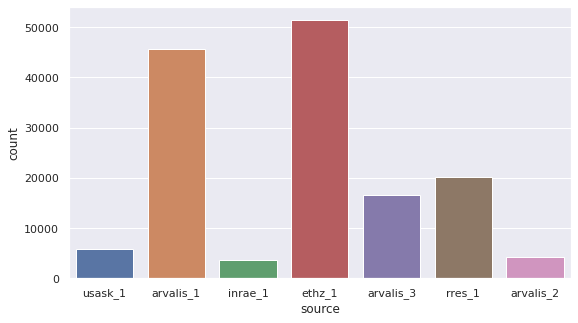

In [9]:
plt.figure(figsize=(9,5))
sns.countplot(df.source)
plt.show()

In [10]:
img_root = '/content/drive/MyDrive/Global-Wheat-Detection-master/Global-Wheat-Detection-master/train/'
len(os.listdir(img_root)) - len(df.image_id.unique())

49

In [11]:
df['bbox'] = df['bbox'].apply(lambda x: x[1:-1].split(","))

df['x'] = df['bbox'].apply(lambda x: x[0]).astype('float32')
df['y'] = df['bbox'].apply(lambda x: x[1]).astype('float32')
df['w'] = df['bbox'].apply(lambda x: x[2]).astype('float32')
df['h'] = df['bbox'].apply(lambda x: x[3]).astype('float32')

df = df[['image_id','x', 'y', 'w', 'h']]
df.head()

,image_id,x,y,w,h
0,b6ab77fd7,834.0,222.0,56.0,36.0
1,b6ab77fd7,226.0,548.0,130.0,58.0
2,b6ab77fd7,377.0,504.0,74.0,160.0
3,b6ab77fd7,834.0,95.0,109.0,107.0
4,b6ab77fd7,26.0,144.0,124.0,117.0


In [12]:
class WheatDetectorConfig(Config):
    # Give the configuration a recognizable name  
    NAME = 'wheat'
    
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 2
    BACKBONE = 'resnet101'
    
    # number of classes (we would normally add +1 for the background)
    # BG + Wheat
    NUM_CLASSES = 2
    
    IMAGE_RESIZE_MODE = "square"
    IMAGE_MIN_DIM = 1024
    IMAGE_MAX_DIM = 1024
    
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 120
    
    # Use different size anchors because our target objects are multi-scale (wheats are some too big, some too small)
    RPN_ANCHOR_SCALES = (16, 32, 64, 128, 256)  # anchor side in pixels
    BACKBONE_STRIDES = [4, 8, 16, 32, 64]
    
    # Learning rate
    LEARNING_RATE = 0.005
    WEIGHT_DECAY  = 0.0005
    
    # Maximum number of ROI’s, the Region Proposal Network (RPN) will generate for the image
    TRAIN_ROIS_PER_IMAGE = 350 
    
    # Skip detections with < 60% confidence
    DETECTION_MIN_CONFIDENCE = 0.60
    
    # Increase with larger training
    VALIDATION_STEPS = 60
    
    # Maximum number of instances that can be detected in one image.
    MAX_GT_INSTANCES = 500 # 200 
 
    # Loss weights for more precise optimization.
    # Can be used for R-CNN training setup.
    LOSS_WEIGHTS = {
        "rpn_class_loss": 1.0,
        "rpn_bbox_loss": 1.0,
        "mrcnn_class_loss": 1.0,
        "mrcnn_bbox_loss": 1.0,
        "mrcnn_mask_loss": 1.0
        }

config = WheatDetectorConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.6
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.005
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INST

In [13]:
def get_jpg(img_dir, anns):
    '''
    input:
        img_dir: image directory of the train sets
        anns: specified image ids for train or validation
    return:
        img files with specified image ids
    '''
    id      = []
    jpg_fps = []

    for index, row in anns.iterrows():
        id.append(row['image_id'])

    for i in os.listdir(img_dir):
        if os.path.splitext(i)[0] not in id:
            continue
        else:
            jpg_fps.append(os.path.join(img_dir, i))

    return list(set(jpg_fps))

def get_dataset(img_dir, anns): 
    image_fps = get_jpg(img_dir, anns)

    image_annotations = {fp: [] for fp in image_fps}

    for index, row in anns.iterrows(): 
        fp = os.path.join(img_dir, row['image_id'] + '.jpg')
        image_annotations[fp].append(row)

    return image_fps, image_annotations 

In [14]:
class DetectorDataset(utils.Dataset):
    def __init__(self, image_fps, image_annotations, orig_height, orig_width):
        super().__init__(self)
        
        # Add classes
        self.add_class('GlobalWheat', 1 , 'Wheat') # only one class, wheat
        
        # add images 
        for id, fp in enumerate(image_fps):
            annotations = image_annotations[fp]
            self.add_image('GlobalWheat', image_id=id, 
                           path=fp, annotations=annotations, 
                           orig_height=orig_height, orig_width=orig_width)

    # load bbox, most important function so far        
    def load_mask(self, image_id):
        info = self.image_info[image_id]
        annotations = info['annotations']
        count = len(annotations)
    
        if count == 0:
            mask = np.zeros((info['orig_height'], info['orig_width'], 1), 
                            dtype=np.uint8)
            class_ids = np.zeros((1,), dtype=np.int32)
        else:
            mask = np.zeros((info['orig_height'], info['orig_width'], count),
                            dtype=np.uint8)
            class_ids = np.zeros((count,), dtype=np.int32)
            for i, a in enumerate(annotations):
                x = int(a['x'])
                y = int(a['y'])
                w = int(a['w'])
                h = int(a['h'])
                mask_instance = mask[:, :, i].copy()
                cv2.rectangle(mask_instance, (x, y), (x+w, y+h), 255, -1)
                mask[:, :, i] = mask_instance
                class_ids[i] = 1
        return mask.astype(np.bool), class_ids.astype(np.int32)
    
    # simple image loader 
    def load_image(self, image_id):
        info = self.image_info[image_id]
        fp = info['path']
        image = cv2.imread(fp, cv2.IMREAD_COLOR)
        # If grayscale. Convert to RGB for consistency.
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)
        return image
    
    # simply return the image path
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']


In [15]:
image_ids = df['image_id'].unique()

valid_ids = image_ids[-700:]
train_ids = image_ids[:-700]

valid_df = df[df['image_id'].isin(valid_ids)]
train_df = df[df['image_id'].isin(train_ids)]
train_df.shape, valid_df.shape

((122106, 5), (25687, 5))

In [16]:
len(train_df.image_id.unique()), len(valid_df.image_id.unique())

(2673, 700)

In [17]:
train_image_fps, train_image_annotations = get_dataset(img_root,
                                                       anns=train_df)

# make data generator with that
dataset_train = DetectorDataset(train_image_fps, 
                                train_image_annotations,
                                ORIG_SIZE, ORIG_SIZE)
dataset_train.prepare()

print("Class Count: {}".format(dataset_train.num_classes))
for i, info in enumerate(dataset_train.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Class Count: 2
  0. BG                                                
  1. Wheat                                             


In [18]:
valid_image_fps, valid_image_annotations = get_dataset(img_root, 
                                           anns=valid_df)

# make data generator with that
dataset_valid = DetectorDataset(valid_image_fps, valid_image_annotations,
                                ORIG_SIZE, ORIG_SIZE)
dataset_valid.prepare()

print("Class Count: {}".format(dataset_valid.num_classes))
for i, info in enumerate(dataset_valid.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Class Count: 2
  0. BG                                                
  1. Wheat                                             


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


(1024, 1024, 3)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


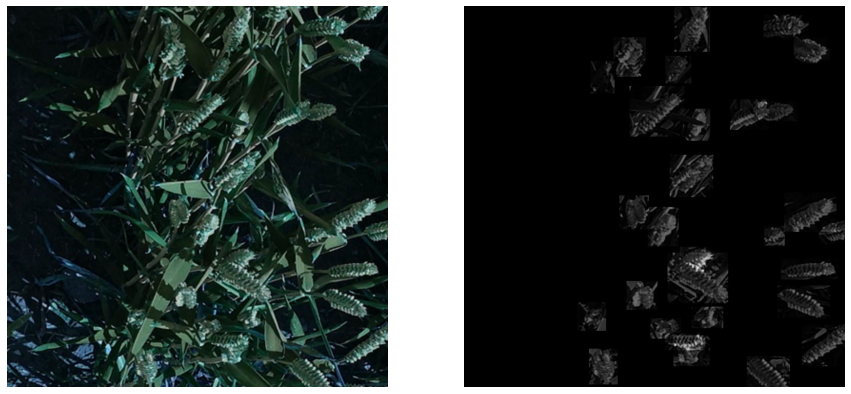

In [19]:
class_ids = [0]

while class_ids[0] == 0:  ## look for a mask
    image_id = random.choice(dataset_train.image_ids)
    image_fp = dataset_train.image_reference(image_id)
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)

print(image.shape)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
masked = np.zeros(image.shape[:2])
for i in range(mask.shape[2]):
    masked += image[:, :, 0] * mask[:, :, i]
plt.imshow(masked, cmap='gray')
plt.axis('off')

print(class_ids)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


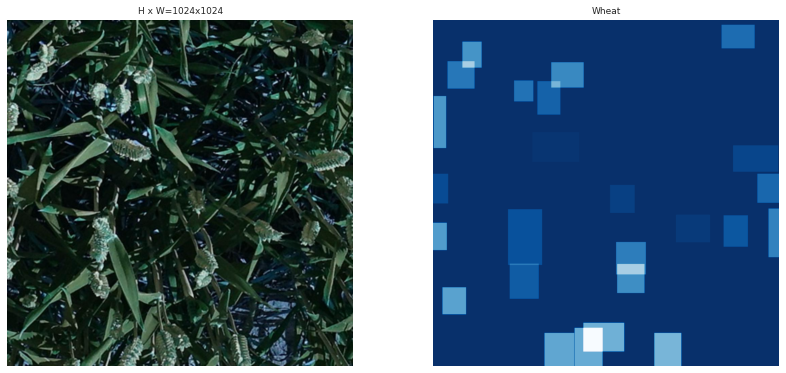

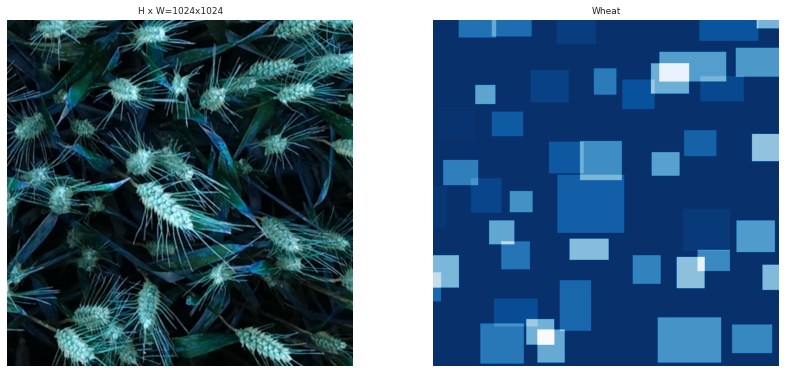

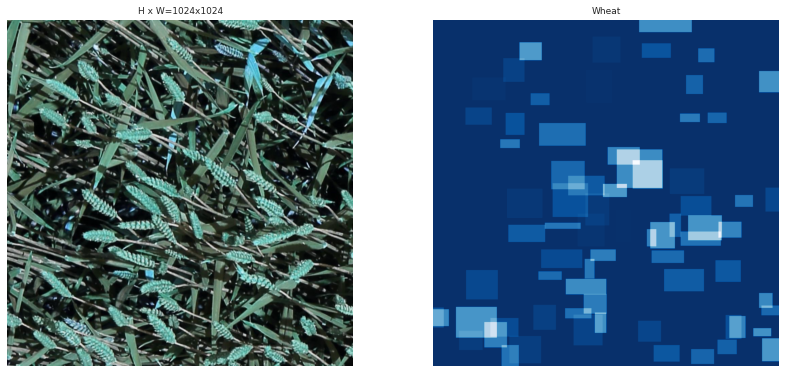

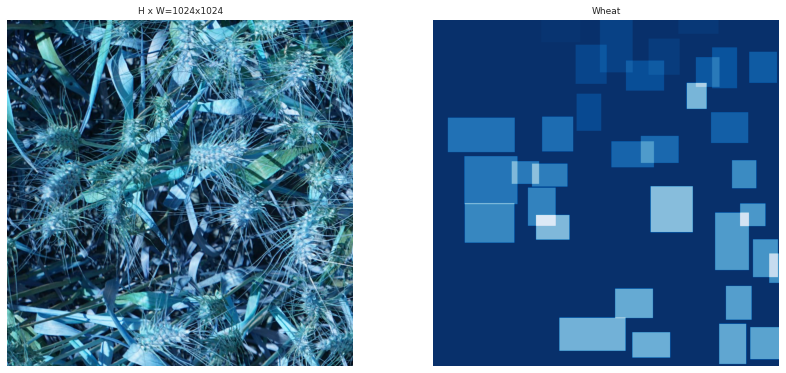

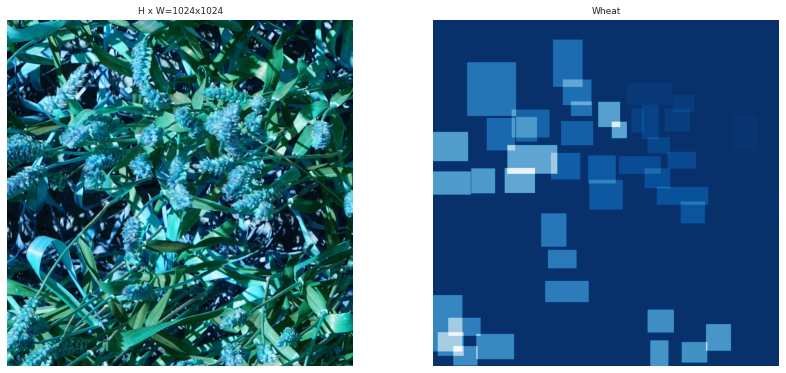

In [ ]:
image_ids = np.random.choice(dataset_train.image_ids,5)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, 
                                dataset_train.class_names, limit=1)

In [ ]:
image_id = np.random.choice(dataset_train.image_ids, 1)[0]
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
original_shape = image.shape

# Resize
image, window, scale, padding, _ = utils.resize_image(image, 
                                                      min_dim=config.IMAGE_MIN_DIM, 
                                                      max_dim=config.IMAGE_MAX_DIM,
                                                      mode=config.IMAGE_RESIZE_MODE)
mask = utils.resize_mask(mask, scale, padding)

# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)

# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, 
                            dataset_train.class_names)

Output hidden; open in https://colab.research.google.com to view.

In [24]:
!pip install keras==2.2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 336 kB 25.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 2.0.8
    Uninstalling Keras-2.0.8:
      Successfully uninstalled Keras-2.0.8


In [20]:
def model_definition():
    print("loading mask R-CNN model")
    model = modellib.MaskRCNN(mode='training', 
                              config=config, 
                              model_dir=packages_root)
    
    # load the weights for COCO
    model.load_weights(data_root + 'mask_rcnn_coco.h5',
                       by_name=True, 
                       exclude=["mrcnn_class_logits",
                                "mrcnn_bbox_fc",  
                                "mrcnn_bbox","mrcnn_mask"])
    return model   

model = model_definition()

loading mask R-CNN model
Instructions for updating:
Colocations handled automatically by placer.


In [21]:
from keras.callbacks import (ModelCheckpoint, ReduceLROnPlateau, CSVLogger)

def callback():
    cb = []
    checkpoint = ModelCheckpoint(packages_root+'wheat_wg.h5',
                                 save_best_only=True,
                                 mode='min',
                                 monitor='val_loss',
                                 save_weights_only=True, verbose=1)
    cb.append(checkpoint)
    reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.3, patience=5,
                                   verbose=1, mode='auto',
                                   epsilon=0.0001, cooldown=1, min_lr=0.00001)
    log = CSVLogger(packages_root+'wheat_history.csv')
    cb.append(log)
    cb.append(reduceLROnPlat)
    return cb

In [22]:
%%time
CB = callback()
TRAIN = False

class WheatInferenceConfig(WheatDetectorConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

if TRAIN:
    model.train(dataset_train, dataset_valid, 
                augmentation=augmentation, 
                learning_rate=config.LEARNING_RATE,
                custom_callbacks = CB,
                epochs=epoch, layers='all') 
else:
    inference_config = WheatInferenceConfig()
    # Recreate the model in inference mode
    model = modellib.MaskRCNN(mode='inference', 
                              config=inference_config,
                              model_dir=packages_root)
    
    model.load_weights(data_root + 'wheat_096269_101_1024.h5', 
                       by_name = True)

/usr/local/lib/python3.7/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Instructions for updating:
Use tf.cast instead.
CPU times: user 7.6 s, sys: 452 ms, total: 8.05 s
Wall time: 10 s


In [ ]:
history = pd.read_csv(data_root + 'wheat_history.csv') 

# find the lowest validation loss score
print(history.loc[history['val_loss'].idxmin()])
history.head()

epoch                   77.000000
loss                     1.097748
mrcnn_bbox_loss          0.232579
mrcnn_class_loss         0.271902
mrcnn_mask_loss          0.299718
rpn_bbox_loss            0.248904
rpn_class_loss           0.044611
val_loss                 1.016543
val_mrcnn_bbox_loss      0.225225
val_mrcnn_class_loss     0.246011
val_mrcnn_mask_loss      0.293907
val_rpn_bbox_loss        0.205175
val_rpn_class_loss       0.046190
Name: 77, dtype: float64


,epoch,loss,mrcnn_bbox_loss,mrcnn_class_loss,mrcnn_mask_loss,rpn_bbox_loss,rpn_class_loss,val_loss,val_mrcnn_bbox_loss,val_mrcnn_class_loss,val_mrcnn_mask_loss,val_rpn_bbox_loss,val_rpn_class_loss
0,0,1.793012,0.396198,0.400109,0.431264,0.429807,0.135600,1.610578,0.309193,0.331686,0.333010,0.482381,0.154273
1,1,1.301321,0.274120,0.328374,0.336091,0.299777,0.062925,1.419602,0.278529,0.364511,0.311159,0.347890,0.117479
2,2,1.216575,0.257206,0.307851,0.323561,0.280012,0.047911,1.360175,0.291734,0.368800,0.320734,0.282121,0.096751
3,3,1.160110,0.240599,0.299956,0.316172,0.254732,0.048616,1.447964,0.306521,0.394653,0.325209,0.311028,0.110518
4,4,1.104426,0.229990,0.283899,0.310955,0.239217,0.040332,1.476106,0.316820,0.378452,0.324366,0.342224,0.114210


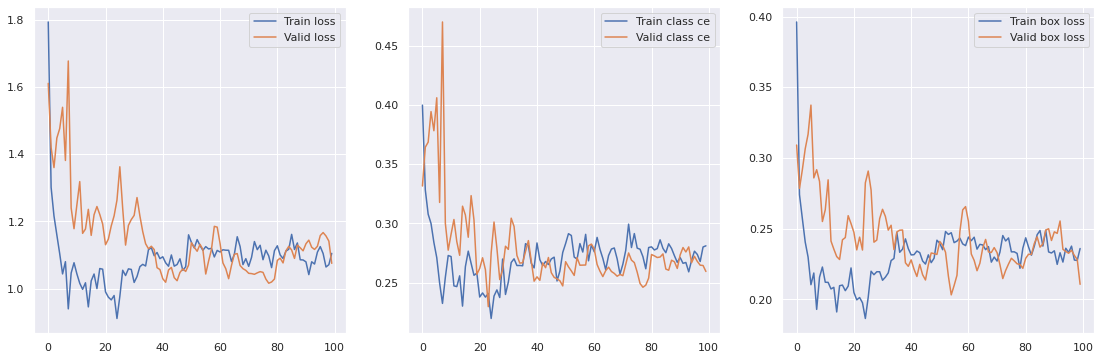

In [ ]:
plt.figure(figsize=(19,6))

plt.subplot(131)
plt.plot(history.epoch, history.loss, label="Train loss")
plt.plot(history.epoch, history.val_loss, label="Valid loss")
plt.legend()

plt.subplot(132)
plt.plot(history.epoch, history.mrcnn_class_loss, label="Train class ce")
plt.plot(history.epoch, history.val_mrcnn_class_loss, label="Valid class ce")
plt.legend()

plt.subplot(133)
plt.plot(history.epoch, history.mrcnn_bbox_loss, label="Train box loss")
plt.plot(history.epoch, history.val_mrcnn_bbox_loss, label="Valid box loss")
plt.legend()

plt.show()

In [23]:
def get_jpg(img_dir):
    jpg_fps = glob.glob(img_dir + '*.jpg')
    return list(set(jpg_fps))

In [24]:
test_img_root  = data_root + 'prediction/'
test_image_fps = get_jpg(test_img_root)

In [25]:
for image_id in test_image_fps:
    image = cv2.imread(image_id, cv2.IMREAD_COLOR)

    # assume square image 
    resize_factor = ORIG_SIZE / config.IMAGE_SHAPE[0]

    # If grayscale. Convert to RGB for consistency.
    if len(image.shape) != 3 or image.shape[2] != 3:
        image = np.stack((image,) * 3, -1) 

    resized_image, window, scale, padding, crop = utils.resize_image(
        image,
        min_dim=config.IMAGE_MIN_DIM,
        min_scale=config.IMAGE_MIN_SCALE,
        max_dim=config.IMAGE_MAX_DIM,
        mode=config.IMAGE_RESIZE_MODE)

    image_id = os.path.splitext(os.path.basename(image_id))[0]

    results = model.detect([resized_image])
    r = results[0]
    for bbox in r['rois']: 
        x1 = int(bbox[1] * resize_factor)
        y1 = int(bbox[0] * resize_factor)
        x2 = int(bbox[3] * resize_factor)
        y2 = int(bbox[2] * resize_factor)
        cv2.rectangle(image, (x1,y1), (x2,y2), (77, 255, 9), 3, 1)
        width  = x2 - x1 
        height = y2 - y1 

   

In [26]:
def predict(test_image_fps, filepath='prediction_mask3.csv', min_conf=0.50):
    # assume square image
    resize_factor = ORIG_SIZE / config.IMAGE_SHAPE[0]

    with open(filepath, 'w') as file:
        file.write("image_id,PredictionString\n")

        for image_id in tqdm(test_image_fps):
            image = cv2.imread(image_id, cv2.IMREAD_COLOR)
            # If grayscale. Convert to RGB for consistency.
            if len(image.shape) != 3 or image.shape[2] != 3:
                image = np.stack((image,) * 3, -1)
                
            image, window, scale, padding, crop = utils.resize_image(
                image,
                min_dim=config.IMAGE_MIN_DIM,
                min_scale=config.IMAGE_MIN_SCALE,
                max_dim=config.IMAGE_MAX_DIM,
                mode=config.IMAGE_RESIZE_MODE)

            image_id = os.path.splitext(os.path.basename(image_id))[0]

            results = model.detect([image])
            r = results[0]

            out_str = ""
            out_str += image_id
            out_str += ","
            
            assert( len(r['rois']) == len(r['class_ids']) == len(r['scores']) )
            
            if len(r['rois']) == 0:
                pass
            else:
                num_instances = len(r['rois'])
                for i in range(num_instances):
                    if r['scores'][i] > min_conf:
                               
                        out_str += ' '
                        out_str += "{0:.4f}".format(r['scores'][i])
                        out_str += ' '

                        # x1, y1, width, height
                        x1 = r['rois'][i][1]
                        y1 = r['rois'][i][0]
                        x2 = r['rois'][i][3] 
                        y2 = r['rois'][i][2]
                        bboxes_str = "{} {} {} {}".format( x1*resize_factor, y1*resize_factor, \
                                                           x2*resize_factor, y2*resize_factor )
                        out_str += bboxes_str

            file.write(out_str+"\n")

In [27]:
print(r['scores'])

[0.9830684  0.97234005 0.9654646  0.85575825 0.7696233  0.7121221
 0.68165493]


In [28]:
print(r['rois'])

[[400 858 693 963]
 [309 164 572 263]
 [612 687 830 753]
 [339 357 657 461]
 [587 226 744 319]
 [484 605 749 701]
 [644 763 895 835]]


In [ ]:
submission = os.path.join(packages_root, 'prediction_mask2.csv')
predict(test_image_fps, filepath=submission)

100%|██████████| 1/1 [00:23<00:00, 23.77s/it]


In [ ]:
submit = pd.read_csv(submission)
submit.head(12)

,image_id,PredictionString
0,wheat1,0.9831 858.0 400.0 105.0 293.0 0.9723 164.0 3...
